In [6]:
#https://keras.io/getting-started/sequential-model-guide/
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

mySlovnik = {} # tu su ulozene vsetky slova
badChars = [".","?",",","!"] # list charov ktorych sa chceme zbavit
batch_size = 32 # pocet sprav v jednom batchy
maxlen = 80 # max dlzka sekvencie

def multiReplace(veta, listWordov, nahrada): #custom replace aby bolo mozne nahradit list danych znakov vo vete naraz
    for ch in listWordov:
        if ch in veta:
            veta = veta.replace(ch, nahrada)
    return veta

def spravaToVector(x_mail): # funkcia na vectorizaciu sprav do sekvenci(list int)
    cleanSlova = []
    
    for m in x_mail:
        m_clean = multiReplace(m, badChars, "")
        slova = m_clean.split(" ")
        for slovo in slova:
            cleanSlova.append(slovo)
            
    for i in range(len(cleanSlova)):
        s = cleanSlova[i]
        if s not in mySlovnik: 
            mySlovnik[s] = len(mySlovnik)
    x_vector = [] #tu sa ulozi vector repre. x_mail
    
    for m in x_mail:
        m_clean = multiReplace(m, badChars, "")
        slova = m_clean.split(" ")
        
        temp = []
        
        for slovo in slova:
            newS = mySlovnik[slovo]
            temp.append(newS)
        
        x_vector.append(temp)
        
    return x_vector

def spamToVector(y_ham):
    y_vector = []
    
    for h in y_ham:
        if h == "ham":
            y_vector.append(0)
        if h == "spam":
            y_vector.append(1)
            
    return y_vector
    



        
dataExcel = pd.read_csv("spam.csv", sep = ",", encoding='latin-1')
x_mail = dataExcel['v2']
y_ham = dataExcel['v1']

vector_x = spravaToVector(x_mail)
vector_y = spamToVector(y_ham)

maximum = len(mySlovnik)

y_spam = list(filter(lambda z: z == 1 , vector_y)) # count pre pocet sprav
print(len(y_spam), "spam sprav sa nachadza v subore")

y_normal = list(filter(lambda z: z == 0, vector_y)) # count pre pocet sprav
print(len(y_normal), "normal sprav sa nachadza v subore")


x_train, x_test, y_train, y_test = train_test_split(vector_x, vector_y, random_state=2, train_size=0.5)
print(len(x_train), 'trenovacich sprav')
print(len(x_test), 'testovacich sprav')


x_train = sequence.pad_sequences(x_train, maxlen=maxlen) #kvoli dodrzaniu rovnakej dlzky sekvenci
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


print('Sequential model...')
model = Sequential()
model.add(Embedding(maximum, 128))
model.add(LSTM(128, dropout=0.25, recurrent_dropout=0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',  #pred trenovanim je potrebne nastavit proces ucenia
              optimizer='adam',
              metrics=['accuracy'])


print('Trenovaci model')
history=model.fit(x_train, y_train,
          batch_size=batch_size,                    
          epochs=3,
          validation_data=(x_test, y_test))


score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Chybovost:', score)
print('Dosiahnuta presnost:', acc)


747 spam sprav sa nachadza v subore
4825 normal sprav sa nachadza v subore
2786 trenovacich sprav
2786 testovacich sprav
Sequential model...


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Trenovaci model
Train on 2786 samples, validate on 2786 samples
Epoch 1/3
2786/2786 [==============================] - 26s 9ms/step - loss: 0.2675 - acc: 0.9088 - val_loss: 0.0876 - val_acc: 0.9756
Epoch 2/3
2786/2786 [==============================] - 22s 8ms/step - loss: 0.0389 - acc: 0.9903 - val_loss: 0.0672 - val_acc: 0.9803
Epoch 3/3
2786/2786 [==============================] - 4s 1ms/step
Chybovost: 0.06291260403929959
Dosiahnuta presnost: 0.9820531227566404


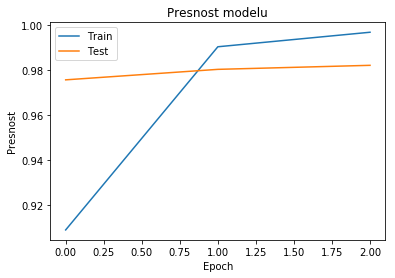

In [7]:
#trenovacia a testovacia presnost
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Presnost modelu')
plt.ylabel('Presnost')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

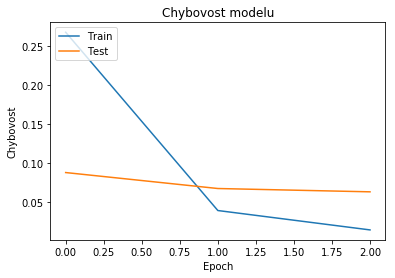

In [8]:
#trenovacia a testovacia strata
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Chybovost modelu')
plt.ylabel('Chybovost')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()